## Выгрузка в датафрейм первого набора (Объекты вокруг земли)

https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

В космическом пространстве существует бесконечное количество объектов. Некоторые из них находятся ближе, чем мы думаем. Хотя нам может казаться, что расстояние в 70 000 км не может причинить нам вред, в астрономическом масштабе это очень маленькое расстояние, которое может нарушить многие природные явления. Таким образом, эти объекты/астероиды могут причинить вред. Поэтому разумно знать, что нас окружает и что может причинить нам вред. Таким образом, этот набор данных содержит список сертифицированных НАСА астероидов, которые классифицируются как ближайшие к Земле объекты.


Проблемная область: угроза космических объектов

Объект наблюдения: астероиды и другие малые тела Солнечной системы


Бизнес-цели: 
1. Мониторинг и предупреждение о космических угрозах
Разработка платформы для регулярного мониторинга потенциально опасных космических объектов с использованием данных из вашего датасета. Это может включать:

Система раннего предупреждения: Создание алгоритмов и моделей, которые бы заранее сообщали о приближении объектов (например, астероидов) к орбите Земли.
Информационные каналы: Предоставление информации о пространственном расположении и траекториях объектов для правительственных организаций и агентств.

2. Консультационные услуги для правительств и бизнеса
Предоставление специализированных услуг по анализу угроз космических объектов, которые могут включать:

Оценка рисков: Анализ угроз и оценка вероятности столкновения для государственных структур, научных организаций и приватного сектора.
Разработка стратегий защиты: Консультирование по вопросам разработки мер защиты и методов нейтрализации потенциальных угроз.

3. Привлечение инвестиций в космическую отрасль
Использование данных для привлечение инвестиций в проекты, связанные с изучением космических объектов и их безопасностью:

Создание стартапов: Поддержка идеи создания стартапов, занимающихся космическими технологиями и защитой Земли от космических угроз.
Привлечение финансирования: Разработка бизнес-стратегий для получения грантов и финансирования от организаций, заинтересованных в космической безопасности.


Актуальность: 
Изучение космических объектов и их взаимодействие с Землей представляет значительный научный интерес. Это также является основой для международного сотрудничества, где государства, организации и научные институты объединяют усилия для наблюдений, исследований и разработки совместных планов по предотвращению угроз.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# вывод всех столбцов
df = pd.read_csv(".//static//csv//neo.csv")
print(df.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


Атрибуты: имя объекта, минимальный и максимальный оценочные диаметры, относительная скорость, расстояние промаха, орбитальное тело, объекты программы "Сентри", абсолютная звездная величина, опасность

## Проверяем на выбросы

Количество выбросов в столбце 'relative_velocity': 1574
Количество выбросов в столбце 'miss_distance': 0
Количество выбросов в столбце 'absolute_magnitude': 101


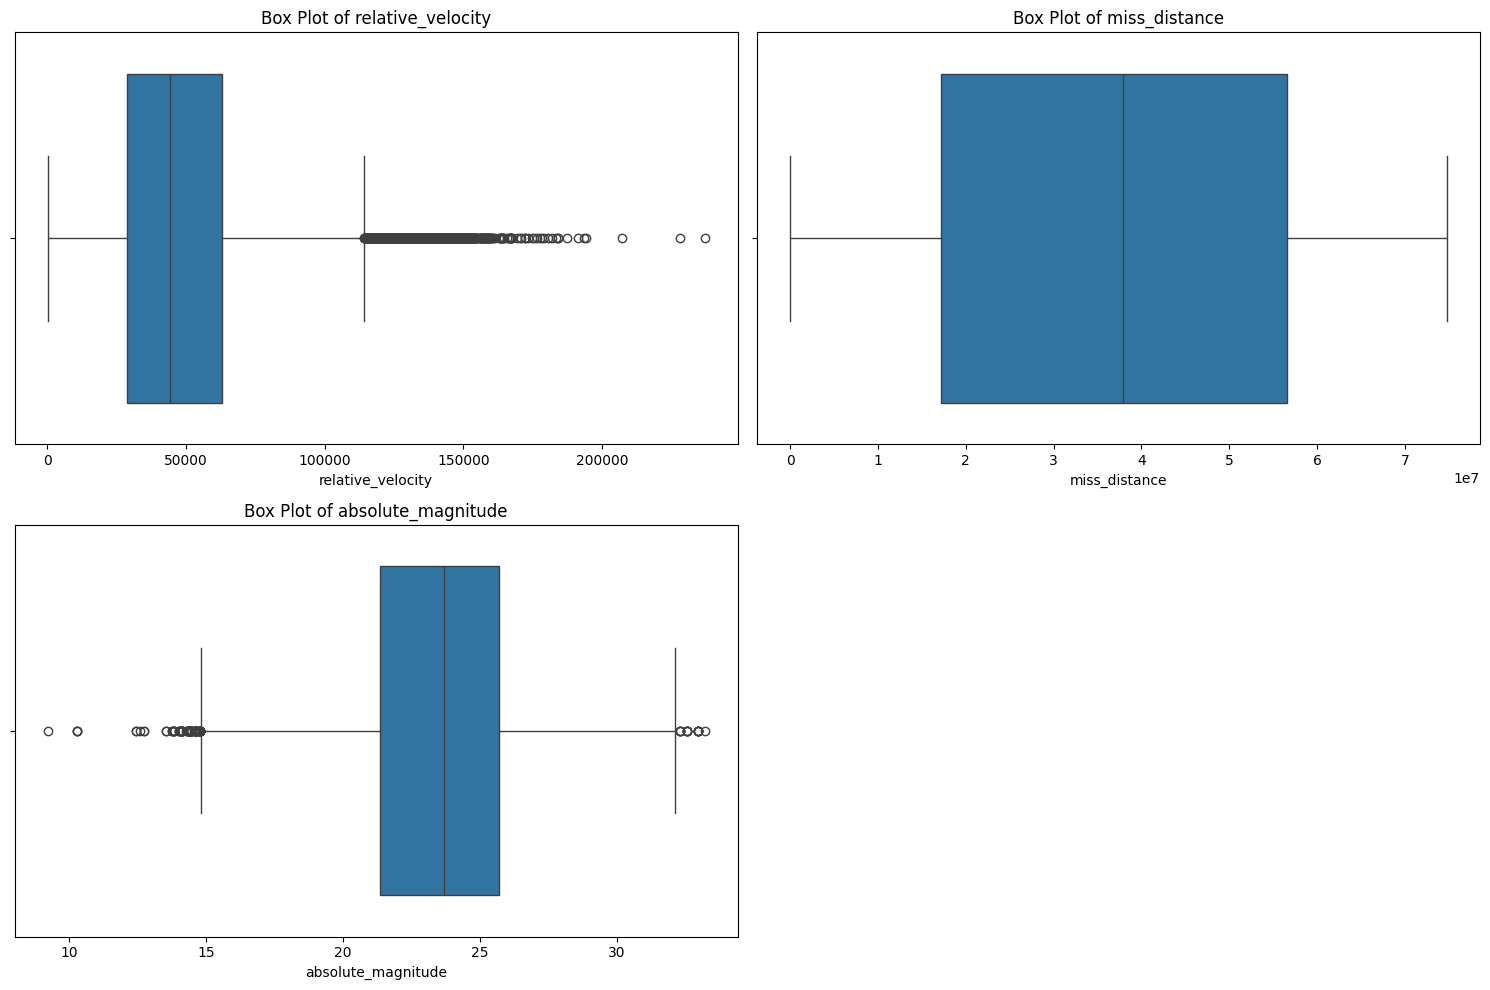

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['relative_velocity', 'miss_distance', 'absolute_magnitude']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

В столбцах 'relative_velocity'и 'absolute_magnitude' присутствуют выбросы. Очистим их.

Количество выбросов в столбце 'relative_velocity': 1574
Количество выбросов в столбце 'absolute_magnitude': 101
Количество удаленных строк: 1678


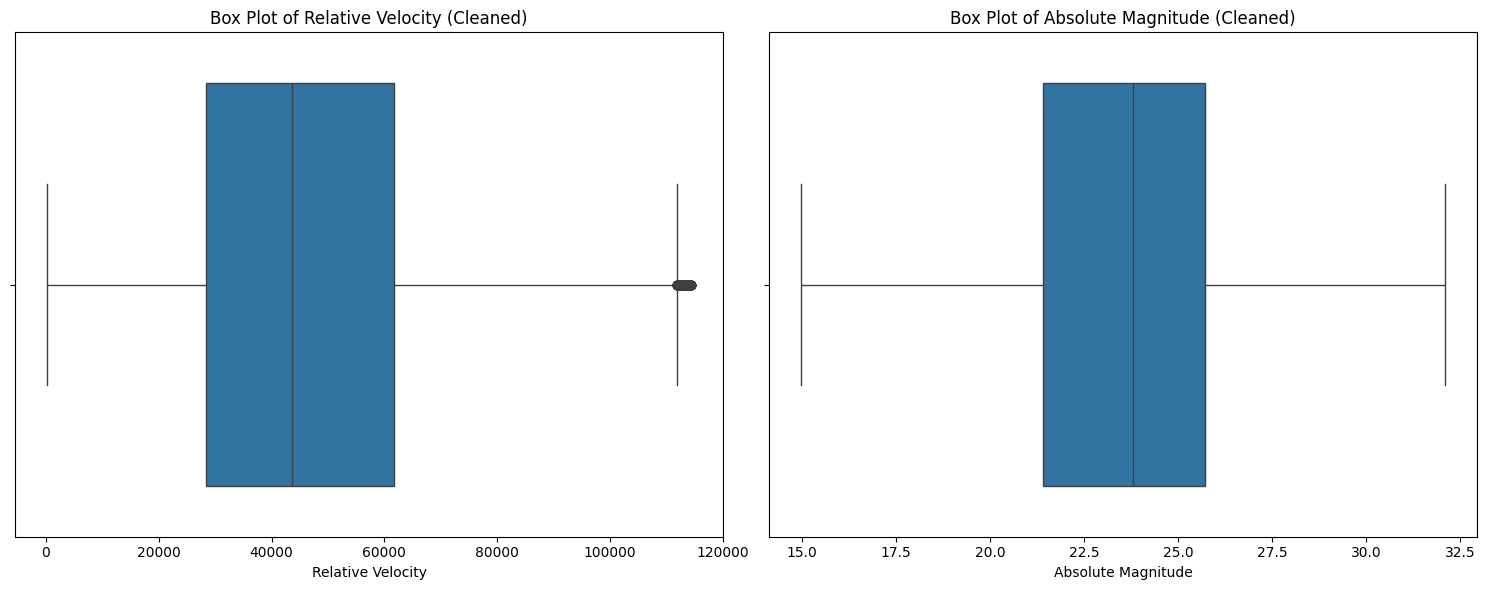

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['relative_velocity', 'absolute_magnitude']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Выбираем столбцы для очистки
columns_to_clean = ['relative_velocity', 'absolute_magnitude']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

# Создаем диаграммы размаха для очищенных данных
plt.figure(figsize=(15, 6))

# Диаграмма размаха для relative_velocity
plt.subplot(1, 2, 1)
sns.boxplot(x=df_cleaned['relative_velocity'])
plt.title('Box Plot of Relative Velocity (Cleaned)')
plt.xlabel('Relative Velocity')

# Диаграмма размаха для absolute_magnitude
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['absolute_magnitude'])
plt.title('Box Plot of Absolute Magnitude (Cleaned)')
plt.xlabel('Absolute Magnitude')

plt.tight_layout()
plt.show()

# Сохраняем очищенный датасет
df_cleaned.to_csv(".//static//csv//neo.csv", index=False)

Выбросов стало меньше.

In [13]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


Пропущенных значений в датасете нет. Можно перейти к созданию выборок

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

print(df.head())  # Вывод первых строк DataFrame

# Разделение на признаки (X) и целевую переменную (y)
# Предположим, что 'hazardous' - это целевая переменная
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

        id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20   

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Функция для анализа сбалансированности
def analyze_balance(y_train, y_val, y_test):
    print("Распределение классов в обучающей выборке:")
    print(y_train.value_counts(normalize=True))
    
    print("\nРаспределение классов в контрольной выборке:")
    print(y_val.value_counts(normalize=True))
    
    print("\nРаспределение классов в тестовой выборке:")
    print(y_test.value_counts(normalize=True))

# Анализ сбалансированности
analyze_balance(y_train, y_val, y_test)

Распределение классов в обучающей выборке:
hazardous
False    0.905989
True     0.094011
Name: proportion, dtype: float64

Распределение классов в контрольной выборке:
hazardous
False    0.905956
True     0.094044
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
hazardous
False    0.906012
True     0.093988
Name: proportion, dtype: float64


Выборки сбалансированы.

## Выгрузка в датафрейм второго набор (цены на бриллианты)

https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

В этом документе рассматривается набор данных, содержащий цены и атрибуты примерно для 54 000 бриллиантов круглой огранки.
В наборе данных 53 940 бриллиантов с 10 характеристиками (карат, огранка, цвет, чистота, глубина, таблица, цена, x, y и z).

Проблемная область: Данные о ценах на бриллианты, включая их характеристики


Объект наблюдения: бриллианты


Пример бизнес-цели:

Анализ рынка: Исследование ценовых трендов на бриллианты в зависимости от различных факторов, таких как качество, размер, цвет и форма. Это позволит оценить динамику цен на рынке и выявить актуальные тренды.

Оптимизация ценовой политики: На основе анализа данных компании смогут создавать более точные и обоснованные ценовые стратегии. Это поможет установить конкурентоспособные цены и увеличить маржинальность продаж.

Прогнозирование цен: Применение методов машинного обучения для прогнозирования будущих цен на бриллианты. Это поможет бизнесу заранее оценить, когда лучше закупать изделия или проводить распродажи.

Сегментация клиентов: Использование данных для сегментации клиентов по их предпочтениям и покупательскому поведению. Это позволит создать целевые маркетинговые кампании и персонализированные предложения.


Актуальность датасета с ценами на бриллианты обусловлена несколькими факторами, влияющими на рынок и потребительские предпочтения. Рассмотрим основные аспекты, подчеркивающие важность такого датасета:

Рынковая динамика: Цены на бриллианты подвержены влиянию различных факторов, таких как экономические условия, изменения в спросе и предложении, а также сезонные колебания. Датасет позволяет отслеживать эти изменения и предсказывать тенденции.

Инвестиционная привлекательность: Бриллианты все чаще рассматриваются как инвестиционный актив. Актуальный датасет помогает инвесторам оценить риски и потенциал доходности, анализируя исторические данные о ценах и их изменениях.

Ценовая прозрачность: Для потребителей доступ к объективным данным о ценах помогает сделать осознанный выбор при покупке. Это актуально в условиях разнообразия предложений и поставщиков на рынке.

Анализ качества: Бриллианты различаются по множеству характеристик (чистота, цвет, огранка и т.д.). Датасет может быть использован для анализа зависимости цен от этих параметров, что поможет покупателям выбрать качественные изделия по выгодным ценам.

Маркетинговые стратегии: Компании могут использовать данные для разработки более целенаправленных и эффективных маркетинговых кампаний, ориентируясь на актуальные тренды и предпочтения аудитории.
Образование и осведомленность: Датасет может служить полезным ресурсом для обучения как профессионалов, так и потребителей. Правильное понимание рынка помогает избежать мошенничества и недобросовестной практики.

Контекст глобальных изменений: В условиях глобализации и влияния различных политических, экономических и социальных факторов на рынок бриллиантов, актуальный датасет становится важным инструментом для анализа, прогноза и адаптации стратегий бизнеса.

In [25]:
import pandas as pd
df = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")
print(df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


Атрибуты: Unnamed: 0 - Неопределено: 0 (или Неизвестный: 0)
carat - Караты
cut - Огранка
color - Цвет
clarity - Чистота
depth - Глубина
table - Площадь огранки
price - Цена
x - Ширина (или X-координата)
y - Длина (или Y-координата)
z - Высота (или Z-координата)

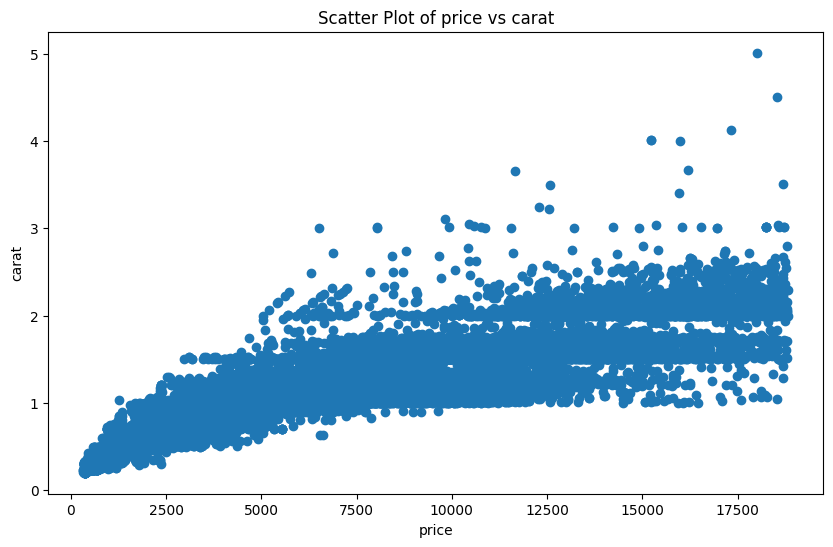

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['carat'])
plt.xlabel('price')
plt.ylabel('carat')
plt.title('Scatter Plot of price vs carat')
plt.show()

Сильнейший выброс был замечен при значении ≈ 17500.

Используем метод метод межквартильного размаха для удаления выбросов.

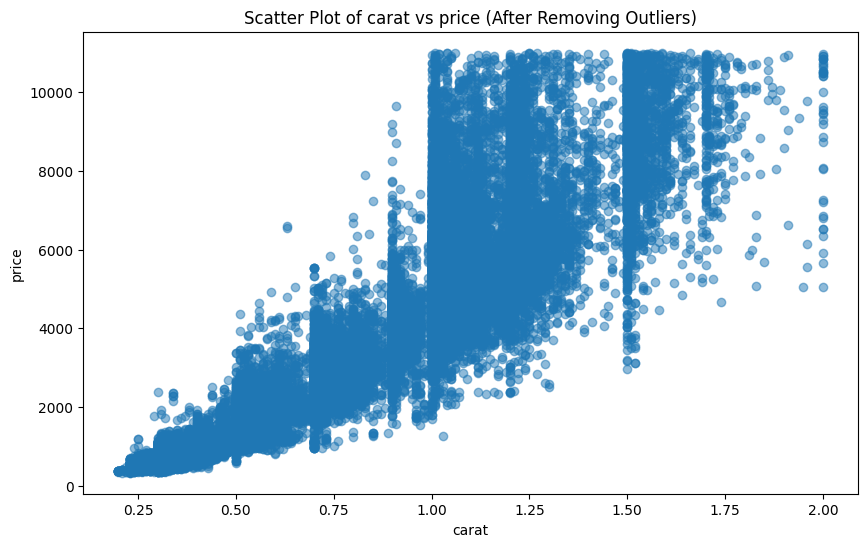

Количество строк до удаления выбросов: 53943
Количество строк после удаления выбросов: 49517


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

# Выбор столбцов для анализа
column1 = 'carat'
column2 = 'price'


# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждого столбца
df_cleaned = df.copy()
for column in [column1, column2]:
    df_cleaned = remove_outliers(df_cleaned, column)

# Построение точечной диаграммы после удаления выбросов
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[column1], df_cleaned[column2], alpha=0.5)
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatter Plot of {column1} vs {column2} (After Removing Outliers)')
plt.show()

# Вывод количества строк до и после удаления выбросов
print(f"Количество строк до удаления выбросов: {len(df)}")
print(f"Количество строк после удаления выбросов: {len(df_cleaned)}")

In [29]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


Пустые строки не обнаружены.

Создадим выборки.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

# Выбор признаков и целевой переменной
X = df.drop('price', axis=1)  # Признаки (все столбцы, кроме 'Price')
y = df['price']  # Целевая переменная ('Price')

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер контрольной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 32365
Размер контрольной выборки: 10789
Размер тестовой выборки: 10789


Проанализируем сбалансированность выборок

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

# Выбор признаков и целевой переменной
X = df.drop('price', axis=1)  # Признаки (все столбцы, кроме 'Price')
y = df['price']  # Целевая переменная ('Price')

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Функция для анализа распределения и вывода результатов
def analyze_distribution(data, title):
    print(f"Распределение Price в {title}:")
    distribution = data.value_counts().sort_index()
    print(distribution)
    total = len(data)
    positive_count = (data > 0).sum()
    negative_count = (data < 0).sum()
    positive_percent = (positive_count / total) * 100
    negative_percent = (negative_count / total) * 100
    print(f"Процент положительных значений: {positive_percent:.2f}%")
    print(f"Процент отрицательных значений: {negative_percent:.2f}%")
    print("\nНеобходима аугментация данных для балансировки классов.\n")

# Анализ распределения для каждой выборки
analyze_distribution(y_train, "обучающей выборке")
analyze_distribution(y_val, "контрольной выборке")
analyze_distribution(y_test, "тестовой выборке")

Распределение Price в обучающей выборке:
price
327      1
334      1
336      1
337      1
338      1
        ..
18791    1
18795    2
18797    1
18804    1
18806    1
Name: count, Length: 9476, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в контрольной выборке:
price
326      2
340      1
344      1
354      1
357      1
        ..
18781    1
18784    1
18791    1
18803    1
18823    1
Name: count, Length: 5389, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в тестовой выборке:
price
335      1
336      1
337      1
351      1
353      1
        ..
18766    1
18768    1
18780    1
18788    1
18818    1
Name: count, Length: 5308, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация д

Применение методов приращения данных (аугментации)

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Загрузка данных
df = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

# Выбор признаков и целевой переменной
X = df.drop('price', axis=1)  # Признаки (все столбцы, кроме 'Price')
y = df['price']  # Целевая переменная ('Price')

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Применение oversampling к обучающей выборке
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Функция для анализа распределения и вывода результатов
def analyze_distribution(data, title):
    print(f"Распределение Price в {title}:")
    distribution = data.value_counts().sort_index()
    print(distribution)
    total = len(data)
    positive_count = (data > 0).sum()
    negative_count = (data < 0).sum()
    positive_percent = (positive_count / total) * 100
    negative_percent = (negative_count / total) * 100
    print(f"Процент положительных значений: {positive_percent:.2f}%")
    print(f"Процент отрицательных значений: {negative_percent:.2f}%")

# Анализ распределения для каждой выборки
analyze_distribution(y_train_resampled, "обучающей выборке после oversampling")
analyze_distribution(y_val, "контрольной выборке")
analyze_distribution(y_test, "тестовой выборке")

Распределение Price в обучающей выборке после oversampling:
price
327      85
334      85
336      85
337      85
338      85
         ..
18791    85
18795    85
18797    85
18804    85
18806    85
Name: count, Length: 9476, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%
Распределение Price в контрольной выборке:
price
326      2
340      1
344      1
354      1
357      1
        ..
18781    1
18784    1
18791    1
18803    1
18823    1
Name: count, Length: 5389, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%
Распределение Price в тестовой выборке:
price
335      1
336      1
337      1
351      1
353      1
        ..
18766    1
18768    1
18780    1
18788    1
18818    1
Name: count, Length: 5308, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%


## Выгрузка в датафрейм третьего набора (Заработная плата рабочих мест в области Data Science)
	
https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary

Для проведения этого анализа был использован набор данных, содержащий релевантную информацию о Data Scientists. Набор данных включает в себя следующие переменные:

work_year:Год выплаты зарплаты.

experience_level: Уровень опыта работы в течение года.

EN > Начальный уровень / Юниор
MI> Средний уровень / Средний
SE > Старший уровень / Эксперт
EX > Исполнительный уровень / Директор
employment_type: Тип занятости для должности.

PT > Частичная занятость
FT > Полный рабочий день
CT > Договор
FL > Фриланс
job_title: На эту должность я работал в течение года.

salary: Общая сумма выплаченной заработной платы брутто.

salary_currency: Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.

salaryinusd: Заработная плата в долларах США.

employee_residence: Основная страна проживания сотрудника в течение рабочего года в виде кода страны по стандарту ISO 3166.

remote_ratio:Общий объем работы, выполненной удаленно.

company_location: Страна местонахождения главного офиса работодателя или филиала по договору.

company_size: Среднее количество людей, которые работали в компании в течение года.


Проблемная область: Данные о зарплатах рабочих мет Data Science


Объект наблюдения: зарплаты


Пример бизнес-цели:

1. Оптимизация процесса найма
Цель: Уменьшить время и затраты на рекрутинг, привлекая кандидатов с адекватными ожиданиями по зарплате.
Применение: Использовать данные о заработной плате для определения конкурентоспособных предложений о работе, что позволит привлекать высококвалифицированные таланты без чрезмерных затрат.

2. Систематизация карьерного роста

Цель: Разработка структурированных карьерных треков и программ повышения квалификации.
Применение: Анализируя данные о зарплатах на разных уровнях должностей, создать систему повышений и соответствующих компенсаций, мотивируя сотрудников для роста внутри компании.

3. Планирование бюджета и прогнозирование кадровых расходов
Цель: Более точное планирование бюджетов на оплату труда в отделах Data Science.
Применение: Использовать анализ рынка для прогнозирования будущих расходов на зарплату, что позволит компании закладывать соответствующие суммы в бюджет.


Актуальность датасета о заработной плате в области Data Science играет ключевую роль для бизнеса и специалистов по работе с данными. Рассмотрим несколько аспектов, подчеркивающих его значимость.

1. Актуальные рыночные тренды
Изменения в спросе и предложении: Данные о зарплатах могут отражать текущие тенденции на рынке труда, такие как повышение спроса на определённые навыки. Это особенно важно в такой динамичной области, как Data Science, где технологии и инструменты быстро развиваются.
Географические различия: Заработные платы могут варьироваться в зависимости от региона (например, наличие IT-центров в крупных городах). Датасет позволяет анализировать, какие регионы предлагают лучшие условия для специалистов.

2. Оценка конкурентоспособности
Сравнение с конкурентами: Знание о текущих зарплатах позволяет компаниям позиционировать себя на рынке труда. Это поможет избежать проблем с удержанием талантов и привлечением новых сотрудников.
Формирование предложений: Данная информация поможет создать программные предложения о работе, которые будут привлекательными для нужной аудитории.



In [45]:
df3 = pd.read_csv(".//static//csv//ds_salaries.csv")

print(df3.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


Атрибуты: 
work_year - Год работы
experience_level - Уровень опыта
employment_type - Тип занятости
job_title - Должность
salary - Зарплата
salary_currency - Валюта зарплаты
salary_in_usd - Зарплата в долларах США
employee_residence - Местонахождение сотрудника
remote_ratio - Доля удаленной работы
company_location - Местоположение компании
company_size - Размер компании

Проверка на выбросы.

Количество выбросов в столбце 'work_year': 76
Количество выбросов в столбце 'salary': 113
Количество выбросов в столбце 'salary_in_usd': 63


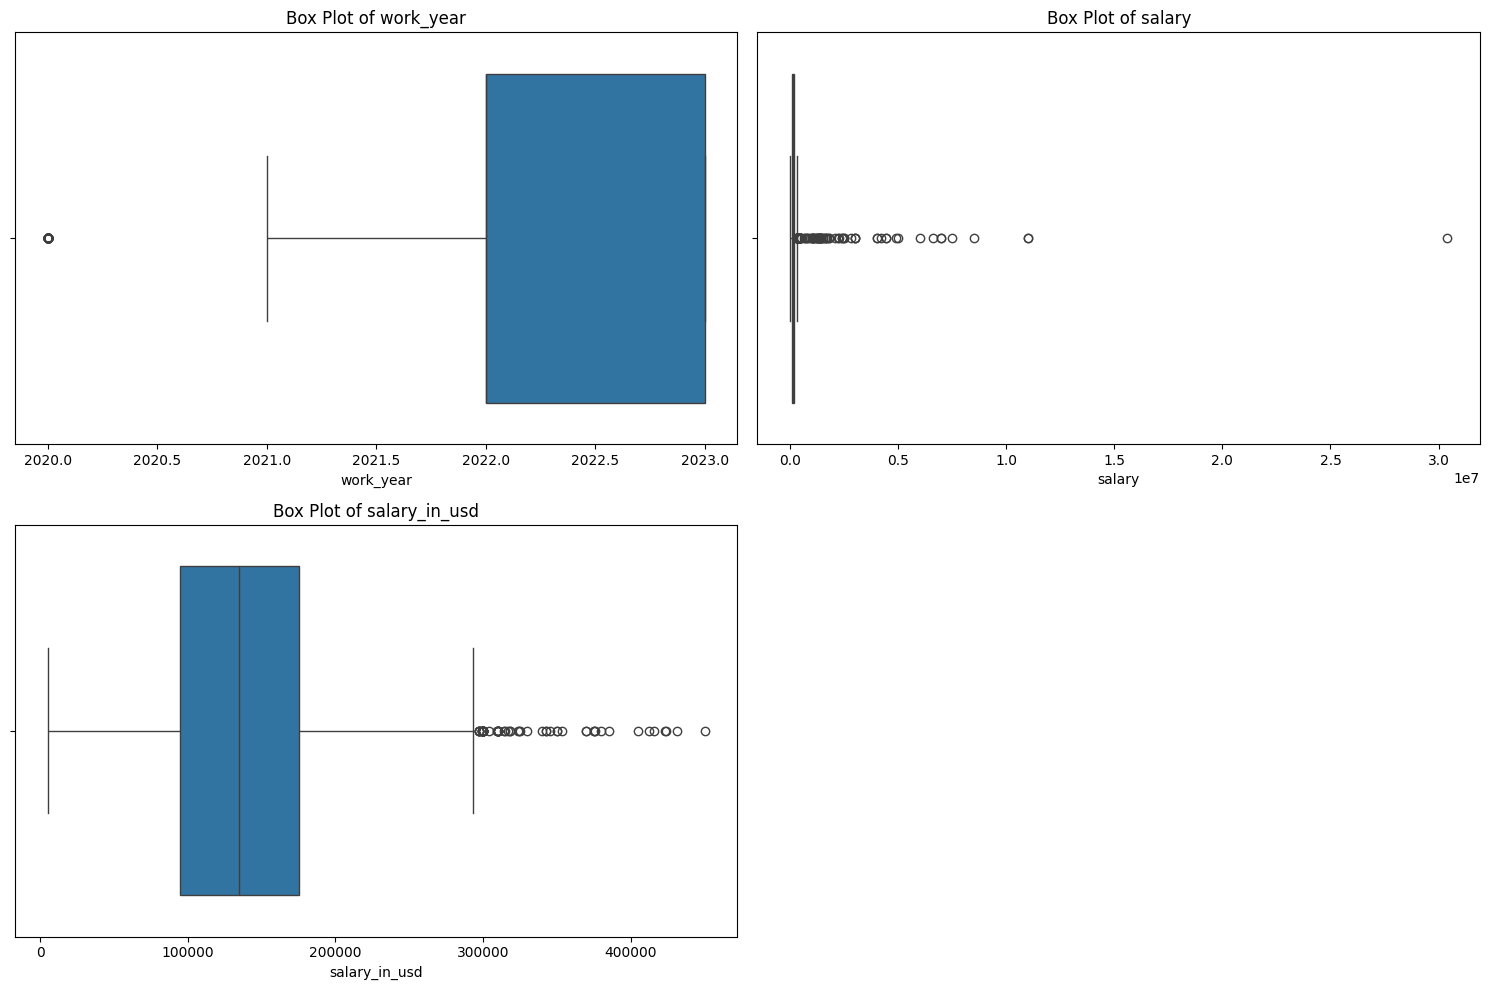

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагаем, что ваш DataFrame df уже загружен

# Выбираем столбцы для анализа
columns_to_check = ['work_year', 'salary', 'salary_in_usd']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        # Проверяем, чтобы данные были числовыми
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Предупреждение: столбец '{col}' не числовой. Пропускаем.")
            continue
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    # Проверяем, чтобы данные были числовыми для построения графика
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
    else:
        print(f"Предупреждение: столбец '{col}' не числовой и не может быть представлен на графике.")
plt.tight_layout()
plt.show()

В столбцах присутствуют выбросы.

Количество выбросов в столбце 'work_year': 76
Количество выбросов в столбце 'salary': 113
Количество выбросов в столбце 'salary_in_usd': 63
Количество удаленных строк: 208


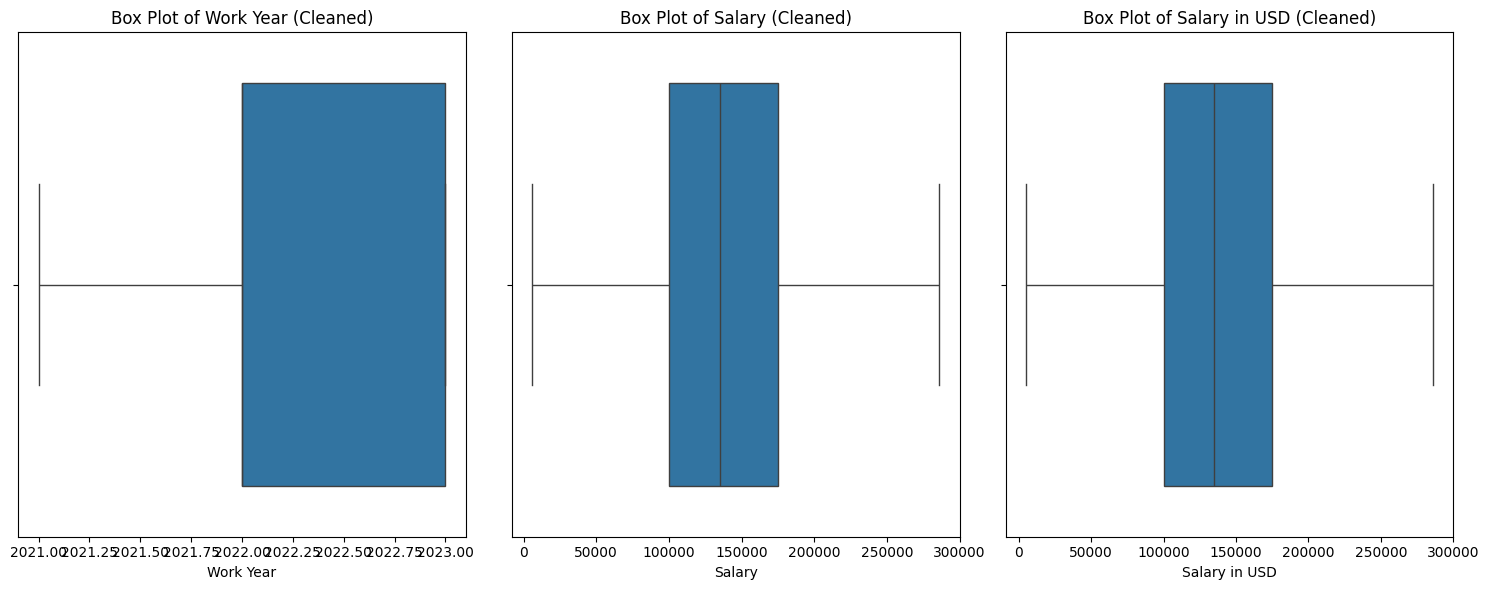

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагаем, что ваш DataFrame df уже загружен

# Выбираем столбцы для анализа
columns_to_check = ['work_year', 'salary', 'salary_in_usd']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Выбираем столбцы для очистки
columns_to_clean = ['work_year', 'salary', 'salary_in_usd']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

# Создаем диаграммы размаха для очищенных данных
plt.figure(figsize=(15, 6))

# Создаем подграфики для каждой переменной
plt.subplot(1, 3, 1)  # Изменено на 1 строку и 3 столбца
sns.boxplot(x=df_cleaned['work_year'])
plt.title('Box Plot of Work Year (Cleaned)')
plt.xlabel('Work Year')

plt.subplot(1, 3, 2)  # Изменено на 1 строку и 3 столбца
sns.boxplot(x=df_cleaned['salary'])
plt.title('Box Plot of Salary (Cleaned)')
plt.xlabel('Salary')

plt.subplot(1, 3, 3)  # Новая диаграмма для salary_in_usd
sns.boxplot(x=df_cleaned['salary_in_usd'])
plt.title('Box Plot of Salary in USD (Cleaned)')
plt.xlabel('Salary in USD')

plt.tight_layout()
plt.show()

# Сохраняем очищенный датасет
df_cleaned.to_csv(".//static//csv//ds_salaries.csv", index=False)

Выбросов стало меньше.


In [66]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


Пропущенные значения отсутствуют. Переходим к созданию выборок.


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

# Разбиение на обучающую и остальную выборку (60% обучающая, 40% остальная)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остальной выборки на контрольную и тестовую (50% контрольная, 50% тестовая)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер контрольной выборки:", X_valid.shape, y_valid.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (2253, 10) (2253,)
Размер контрольной выборки: (751, 10) (751,)
Размер тестовой выборки: (751, 10) (751,)


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

# Разбиение на обучающую и остальную выборку (60% обучающая, 40% остальная)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остальной выборки на контрольную и тестовую (50% контрольная, 50% тестовая)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Функция для анализа сбалансированности выборки
def analyze_balance(y_train, y_valid, y_test):
    print("Анализ сбалансированности выборки:")
    
    # Описание для обучающей выборки
    print("\nОбучающая выборка:")
    print(y_train.describe())
    
    # Описание для контрольной выборки
    print("\nКонтрольная выборка:")
    print(y_valid.describe())
    
    # Описание для тестовой выборки
    print("\nТестовая выборка:")
    print(y_test.describe())

# Анализ сбалансированности выборки
analyze_balance(y_train, y_valid, y_test)

Анализ сбалансированности выборки:

Обучающая выборка:
count      2253.000000
mean     137387.371505
std       62741.721382
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      177000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

Контрольная выборка:
count       751.000000
mean     138156.014647
std       64747.578329
min        5409.000000
25%       95000.000000
50%      132000.000000
75%      175000.000000
max      430967.000000
Name: salary_in_usd, dtype: float64

Тестовая выборка:
count       751.00000
mean     137533.82024
std       62357.85690
min        5409.00000
25%       97600.00000
50%      133300.00000
75%      174750.00000
max      423834.00000
Name: salary_in_usd, dtype: float64


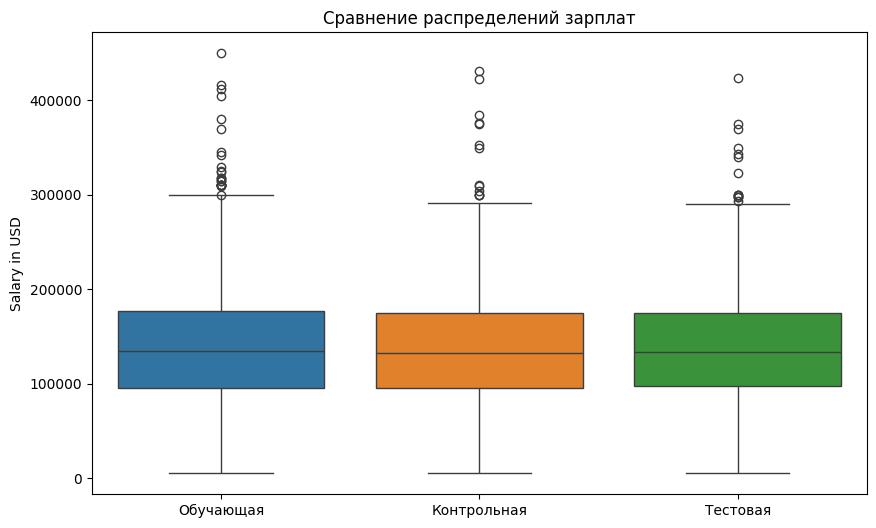

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Объедините выборки в один DataFrame для визуализации
data = pd.concat([y_train, y_valid, y_test], axis=1)
data.columns = ['train', 'valid', 'test']

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Сравнение распределений зарплат')
plt.ylabel('Salary in USD')
plt.xticks(ticks=[0, 1, 2], labels=['Обучающая', 'Контрольная', 'Тестовая'])
plt.show()